# Desafío - Gráficos y correlación

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 1. Importar librerías y .csv

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

path_gdrive = "/content/drive/MyDrive/Data Scientist/Desafío Latam/2 .-Fundamentos Data Science/4.- Hipótesis y correlación/Desafíos/nations.csv"
path_normal = "nation.csv"
df = pd.read_csv(path_normal, encoding= 'iso-8859-1').drop(columns = 'Unnamed: 0')
print(df.head())
df.shape

        country  region           gdp  ...   literacy   co2       gini
0       Algeria  Africa   7300.399902  ...  72.599998  15.0        NaN
1         Benin  Africa   1338.800049  ...  41.700001   1.2        NaN
2      Botswana  Africa  12307.400391  ...  84.099998   9.2        NaN
3  Burkina Faso  Africa   1063.400024  ...  23.600000   0.2        NaN
4       Burundi  Africa    349.200012  ...  66.599998   0.1  33.299999

[5 rows x 13 columns]


(194, 13)

# 2. Refactor gráficos matplotlib a seaborn

In [3]:
print("adfert:​ Fertilidad adolescente (Nacimientos 1:1000 en mujeres entre 15 y 19).")

adfert:​ Fertilidad adolescente (Nacimientos 1:1000 en mujeres entre 15 y 19).


a) Histogramas

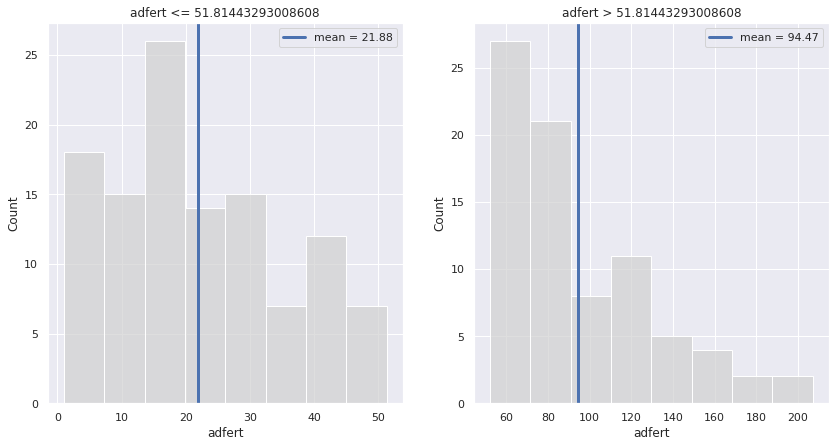


La media de cada histograma naturalmente tendrán diferencias ya que son datasets distintos,
curiosamente ambos histogramas tienen mayor cantidad de datos a su respectivo lado izquierdo del plot


In [4]:
df['binaria'] = np.where(df['adfert'] > df['adfert'].mean(), 1, 0)

sns.set_theme()

plt.rcParams["figure.figsize"] = (14,7)
plt.subplot(1,2,1)
sns.histplot(df[df['binaria'] == 0]['adfert'] , color = 'lightgray').set(title=f"adfert <= {df['adfert'].mean()}")
mean_0 = df[df['binaria'] == 0]['adfert'].mean()
plt.axvline(mean_0, lw = 3, label = f"mean = {np.round(mean_0,2)}")
plt.legend()
plt.subplot(1,2,2)
sns.histplot(df[df['binaria'] == 1]['adfert'] , color = 'lightgray').set(title=f"adfert > {df['adfert'].mean()}")
mean_1 = df[df['binaria'] == 1]['adfert'].mean()
plt.axvline(mean_1, lw = 3, label = f"mean = {np.round(mean_1,2)}")
plt.legend()
plt.show()


print("""
La media de cada histograma naturalmente tendrán diferencias ya que son datasets distintos,
curiosamente ambos histogramas tienen mayor cantidad de datos a su respectivo lado izquierdo del plot""")

b) Boxplots

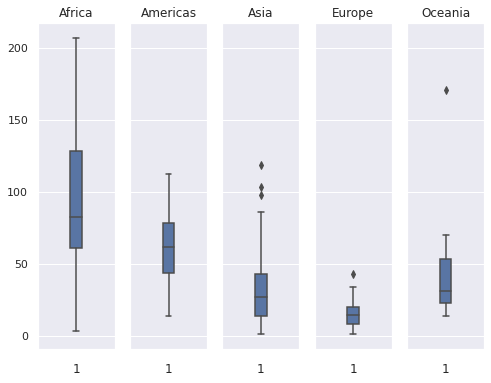


La fertilidad en mujeres de 15-19 años es mucho más alta en continentes que tienen tendencia a ser menos desarollados
África tiene el mayor índice de todos los continentes, europa el más bajo
Curiosamente oceanía tiene 1 outlier, y su media es sobre la de europa pero más baja que américa


In [5]:
j = 0
fig, axes = plt.subplots(1, len(df['region'].unique()), figsize=(8, 6), sharey=True)
for i in df['region'].unique():
  dataframe = df[df['region'] == i]
  sns.boxplot(
      ax = axes[j],
      data = dataframe,
      y = 'adfert',
      width=0.15
    )
  axes[j].set_title(i)
  axes[j].set_xlabel('1')
  axes[j].set_ylabel('')
  j += 1
plt.show()
print("""
La fertilidad en mujeres de 15-19 años es mucho más alta en continentes que tienen tendencia a ser menos desarollados
África tiene el mayor índice de todos los continentes, europa el más bajo
Curiosamente oceanía tiene 1 outlier, y su media es sobre la de europa pero más baja que américa""")

c) Scatterplots

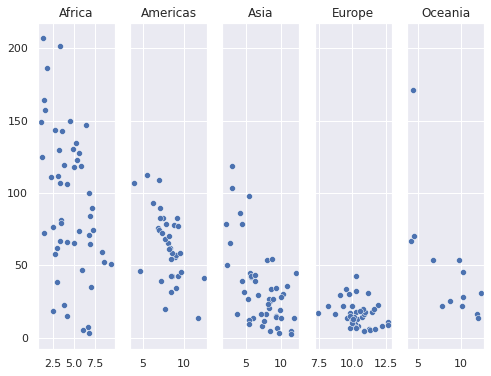


En la mayoría de los continentes a menor cantidad de años de escolaridad mayor es la fertilidad de mujeres entre 15-19 años. y biceversa
En áfrica hay índices bastantes altos de fertilidad a una cantidad de años de escolaridad baja.
También notar que en Europa, no hay paises con índices de fertilidad mayor a 50, y la cantidad de años de escolaridad es
como mínimo 7.5.
El gráfico sería mejor todavía si se compartiera xtics (sharex = True en los argumentos de plt.subplots())




In [6]:
j = 0
fig, axes = plt.subplots(1, len(df['region'].unique()), figsize=(8, 6), sharey=True)
for i in df['region'].unique():
  dataframe = df[df['region'] == i]
  sns.scatterplot(
      ax = axes[j],
      data = dataframe,
      x = 'school',
      y = 'adfert',
    )
  axes[j].set_title(i)
  axes[j].set_xlabel('')
  axes[j].set_ylabel('')
  j += 1
plt.show()
print("""
En la mayoría de los continentes a menor cantidad de años de escolaridad mayor es la fertilidad de mujeres entre 15-19 años. y biceversa
En áfrica hay índices bastantes altos de fertilidad a una cantidad de años de escolaridad baja.
También notar que en Europa, no hay paises con índices de fertilidad mayor a 50, y la cantidad de años de escolaridad es
como mínimo 7.5.
El gráfico sería mejor todavía si se compartiera xtics (sharex = True en los argumentos de plt.subplots())

""")

# 3. Genere un heatmap entre todas las variables.

En base a las variables de interés asignadas, comente cuáles son las principales correlaciones existentes, tomando como criterio de corte aquellas superior a .6

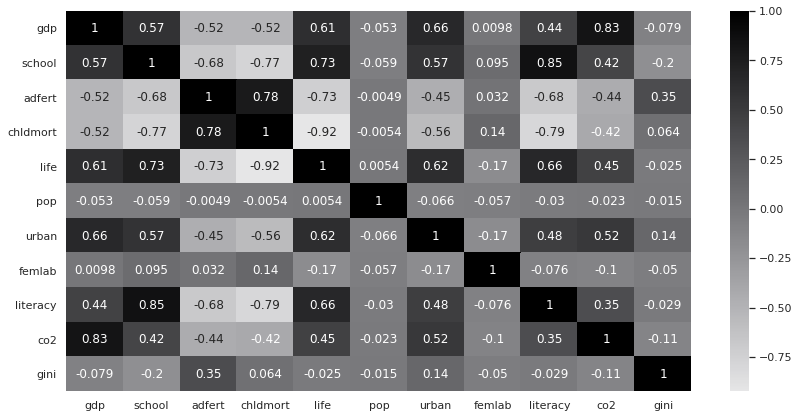


Los 6 pares de variables más POSITIVAMENTE correlacionadas con otra distinta a si mismaciones es:

1) Literacy + Schoool = 0.85 / alfabetismo vs años de escolaridad
2) co2 + gdp = 0.83 / c02 emitido vs producto interno bruto (ambos per cápita)
3) life + school = 0.73 / esperanza de vida vs años de escolaridad
4) literacy + life = 0.66 / alfabetismo vs esperanza de vida
5) urban + gdp = 0.66 / %población urbana vs producto interno bruto
6) life + gdp = 0.61 / esperanza de vida vs producto interno bruto

Comentario extra: pop no está correlacionado con nada, al igual que femlab, quizás también gini



In [7]:
df = df.drop(columns = 'binaria')
cmap = sns.cubehelix_palette(50, hue=0.05, rot=0, light=0.9, dark=0, as_cmap=True)
sns.heatmap(df.corr(), cmap = cmap, annot= True)
plt.show()

print("""
Los 6 pares de variables más POSITIVAMENTE correlacionadas con otra distinta a si mismaciones es:

1) Literacy + Schoool = 0.85 / alfabetismo vs años de escolaridad
2) co2 + gdp = 0.83 / c02 emitido vs producto interno bruto (ambos per cápita)
3) life + school = 0.73 / esperanza de vida vs años de escolaridad
4) literacy + life = 0.66 / alfabetismo vs esperanza de vida
5) urban + gdp = 0.66 / %población urbana vs producto interno bruto
6) life + gdp = 0.61 / esperanza de vida vs producto interno bruto

Comentario extra: pop no está correlacionado con nada, al igual que femlab, quizás también gini
""")

# 4.En base a las principales correlaciones, sepárelas en un nuevo objeto y calcule la matriz de correlaciones para todas las regiones

● Tip : Genere una nueva tabla segmentando con la siguiente sintaxis: `= df.loc[ : ,[​ 'variables'​ , ​'a' ​,​ 'agregar' ​]]`.
No olvide agregar la variable region.

● Tip :​ Genere un loop para recorrer cada región y generar un heatmap.

● Comente brevemente las principales correlaciones a través de las regiones.

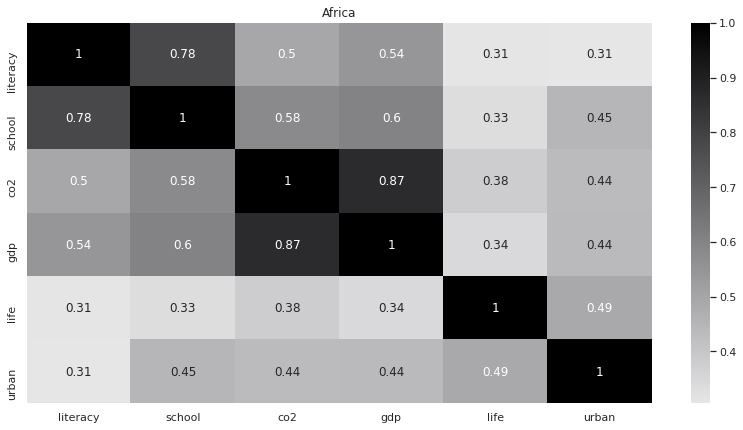

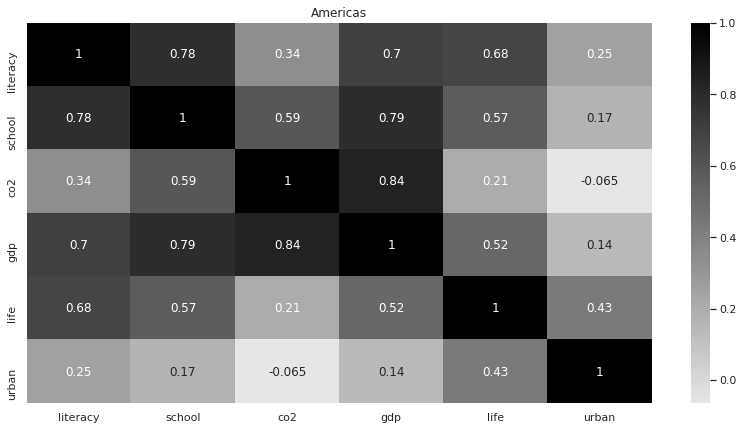

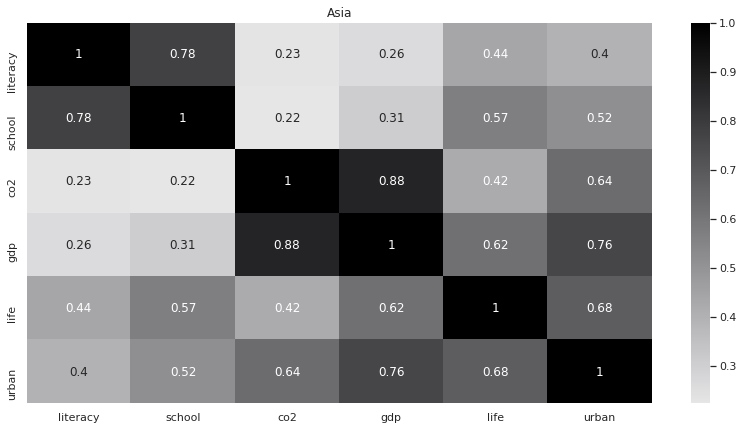

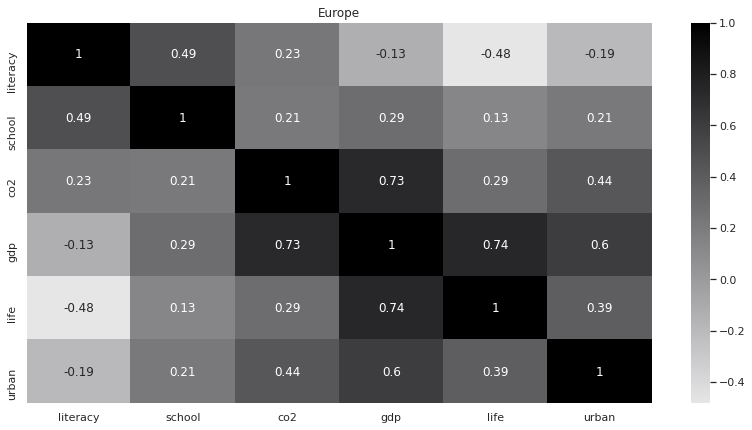

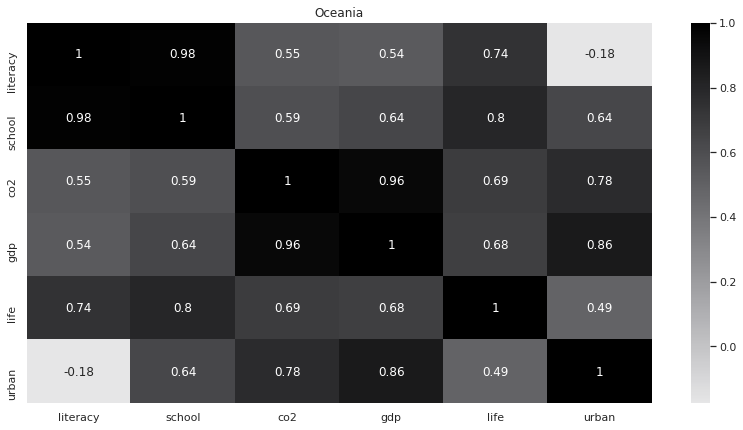



África:
1) gdp + co2 = 0.87
2) school + literacy = 0.78

Américas:
1) gdp + co2 = 0.84
2) gdp + school = 0.79
3) school + literacy = 0.78
4) gdp + literacy = 0.7

Asia:
1) co2 + gdp = 0.88
2) school + literacy = 0.78
3) urban + gdp = 0.76

Europe:
1) gdp + life = 0.74
2) gdp + co2 = 0.73
3) gdp + urban = 0.6

Oceanía:
1) school + literacy = 0.98
2) gdp + co2 = 0.96
3) urban + gdp = 0.86
4) life +school = 0.8

A modo general, siempre hay una alta correlación entre gdp y co2, y en todas menos europa, una alta correlación entre
shool y literacy (cuiorsamente), nada que ver con ocenía donde esta última es 0.98 a diferencia de europa que es apenas un 0.49

También gdp es una variable altamente correlacionable en las principales que estamos analizando, gdp vs el resto de variables como:
a) life
b) school
c) literacy
d) co2

irán de la mano





In [8]:
vars = ['literacy', 'school', 'co2', 'gdp', 'life', 'urban']
cmap = sns.cubehelix_palette(50, hue=0.05, rot=0, light=0.9, dark=0, as_cmap=True)

for i in df['region'].unique():
  dataframe = df[df['region'] == i][vars]
  sns.heatmap(
      dataframe.corr(),
      cmap= cmap,
      annot= True).set_title(i)
  plt.show()
  print("")
print("""
África:
1) gdp + co2 = 0.87
2) school + literacy = 0.78

Américas:
1) gdp + co2 = 0.84
2) gdp + school = 0.79
3) school + literacy = 0.78
4) gdp + literacy = 0.7

Asia:
1) co2 + gdp = 0.88
2) school + literacy = 0.78
3) urban + gdp = 0.76

Europe:
1) gdp + life = 0.74
2) gdp + co2 = 0.73
3) gdp + urban = 0.6

Oceanía:
1) school + literacy = 0.98
2) gdp + co2 = 0.96
3) urban + gdp = 0.86
4) life +school = 0.8

A modo general, siempre hay una alta correlación entre gdp y co2, y en todas menos europa, una alta correlación entre
shool y literacy (cuiorsamente), nada que ver con ocenía donde esta última es 0.98 a diferencia de europa que es apenas un 0.49

También gdp es una variable altamente correlacionable en las principales que estamos analizando, gdp vs el resto de variables como:
a) life
b) school
c) literacy
d) co2

irán de la mano


""")

# Bonus Points:
Grafique los diagramas de dispersión para los principales hallazgos

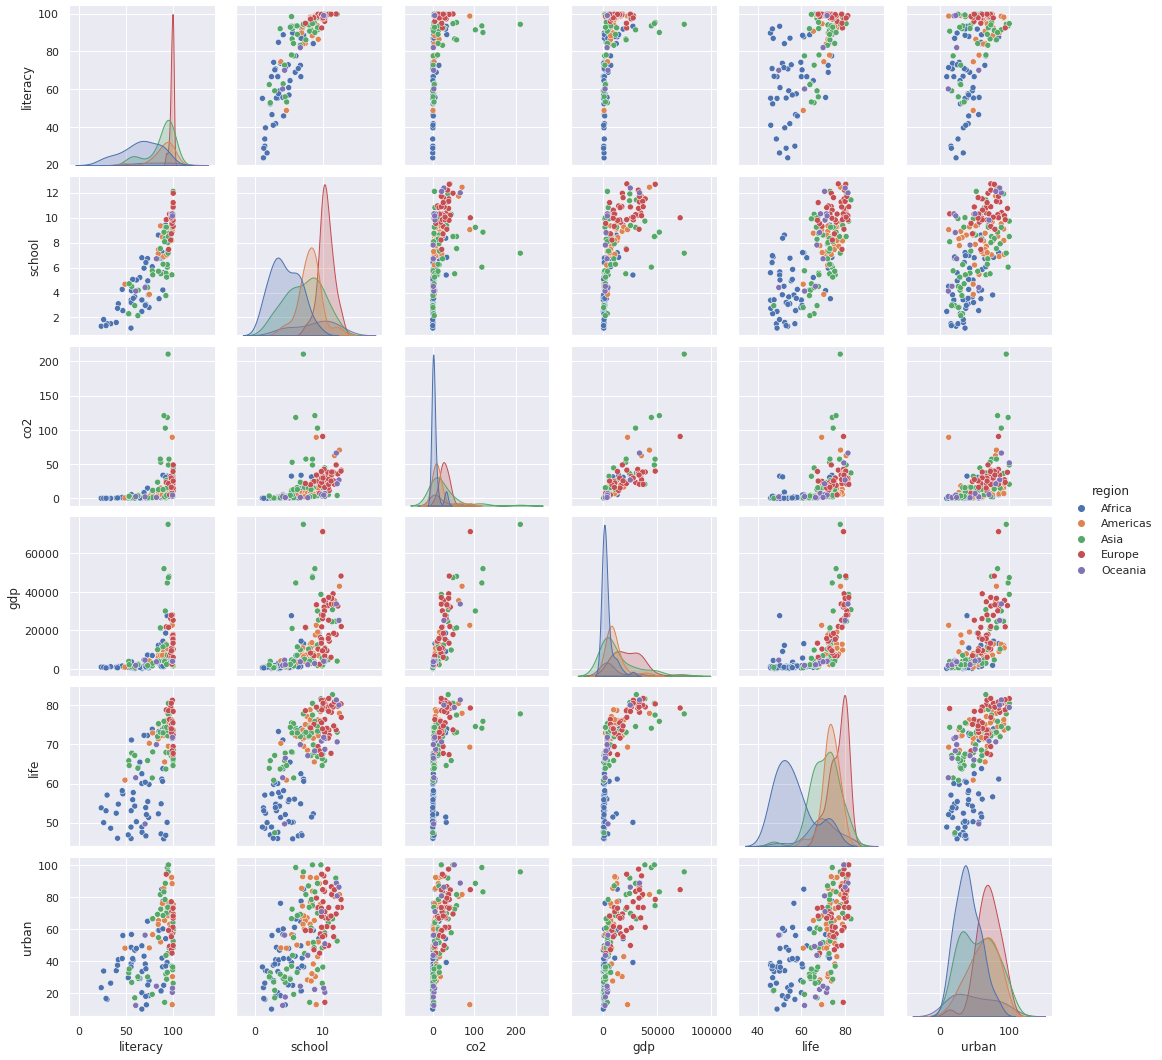

In [9]:
vars.append('region')

sns.pairplot(
    data = df[vars],
    hue = 'region'
    )

In [10]:
vars

['literacy', 'school', 'co2', 'gdp', 'life', 'urban', 'region']